#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree 

## Dataset Loading

In [3]:
df=pd.read_csv("/content/dermatology.csv")
df

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# EDA

In [4]:
df.head(10)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [5]:
df.shape

(366, 35)

In [6]:
df.columns

Index([' erythema', ' scaling', ' definite borders', ' itching',
       ' koebner phenomenon', ' polygonal papules', ' follicular papules',
       ' oral mucosal involvement', ' knee and elbow involvement',
       ' scalp involvement', ' family history', ' melanin incontinence',
       ' eosinophils in the infiltrate', ' PNL infiltrate',
       ' fibrosis of the papillary dermis', ' exocytosis', ' acanthosis',
       ' hyperkeratosis', ' parakeratosis', ' clubbing of the rete ridges',
       ' elongation of the rete ridges',
       ' thinning of the suprapapillary epidermis', ' spongiform pustule',
       ' munro microabcess', ' focal hypergranulosis',
       ' disappearance of the granular layer',
       ' vacuolisation and damage of basal layer', ' spongiosis',
       ' saw-tooth appearance of retes', ' follicular horn plug',
       ' perifollicular parakeratosis', ' inflammatory monoluclear inflitrate',
       ' band-like infiltrate', 'Age', 'class'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral mucosal involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee and elbow involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0    erythema                                  366 non-null    int64 
 1    scaling                                   366 non-null    int64 
 2    definite borders                          366 non-null    int64 
 3    itching                                   366 non-null    int64 
 4    koebner phenomenon                        366 non-null    int64 
 5    polygonal papules                         366 non-null    int64 
 6    follicular papules                        366 non-null    int64 
 7    oral mucosal involvement                  366 non-null    int64 
 8    knee and elbow involvement                366 non-null    int64 
 9    scalp involvement                         366 non-null    int64 
 10   family history                       

In [9]:
df.isnull().sum()

 erythema                                    0
 scaling                                     0
 definite borders                            0
 itching                                     0
 koebner phenomenon                          0
 polygonal papules                           0
 follicular papules                          0
 oral mucosal involvement                    0
 knee and elbow involvement                  0
 scalp involvement                           0
 family history                              0
 melanin incontinence                        0
 eosinophils in the infiltrate               0
 PNL infiltrate                              0
 fibrosis of the papillary dermis            0
 exocytosis                                  0
 acanthosis                                  0
 hyperkeratosis                              0
 parakeratosis                               0
 clubbing of the rete ridges                 0
 elongation of the rete ridges               0
 thinning of 

In [10]:
for i in df:
  print(i,"=",df[i].unique())


 erythema = [2 3 1 0]
 scaling = [2 3 1 0]
 definite borders = [0 3 2 1]
 itching = [3 2 0 1]
 koebner phenomenon = [0 1 2 3]
 polygonal papules = [0 3 2 1]
 follicular papules = [0 3 1 2]
 oral mucosal involvement = [0 3 2 1]
 knee and elbow involvement = [1 0 3 2]
 scalp involvement = [0 1 2 3]
 family history = [0 1]
 melanin incontinence = [0 1 2 3]
 eosinophils in the infiltrate = [0 2 1]
 PNL infiltrate = [0 1 3 2]
 fibrosis of the papillary dermis = [0 3 1 2]
 exocytosis = [3 1 0 2]
 acanthosis = [2 3 1 0]
 hyperkeratosis = [0 2 1 3]
 parakeratosis = [0 2 3 1]
 clubbing of the rete ridges = [0 2 1 3]
 elongation of the rete ridges = [0 2 3 1]
 thinning of the suprapapillary epidermis = [0 2 3 1]
 spongiform pustule = [0 2 1 3]
 munro microabcess = [0 1 2 3]
 focal hypergranulosis = [0 2 3 1]
 disappearance of the granular layer = [0 3 2 1]
 vacuolisation and damage of basal layer = [0 2 3 1]
 spongiosis = [3 0 2 1]
 saw-tooth appearance of retes = [0 2 3 1]
 follicular horn plug

In [11]:
df['Age']= df['Age'].replace("?", 36)

In [12]:
df.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', 36, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [13]:
df['Age']=pd.to_numeric(df['Age'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0    erythema                                  366 non-null    int64
 1    scaling                                   366 non-null    int64
 2    definite borders                          366 non-null    int64
 3    itching                                   366 non-null    int64
 4    koebner phenomenon                        366 non-null    int64
 5    polygonal papules                         366 non-null    int64
 6    follicular papules                        366 non-null    int64
 7    oral mucosal involvement                  366 non-null    int64
 8    knee and elbow involvement                366 non-null    int64
 9    scalp involvement                         366 non-null    int64
 10   family history                            366 non

#outlier Detection Using Boxplot

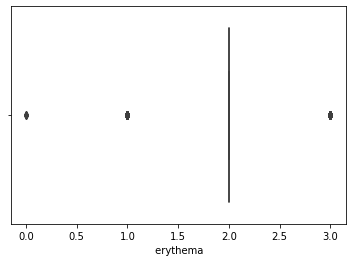

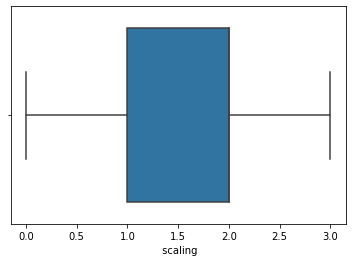

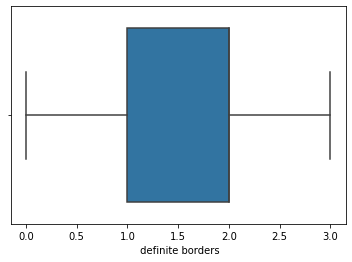

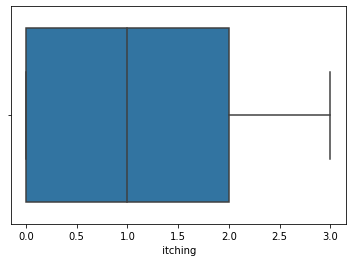

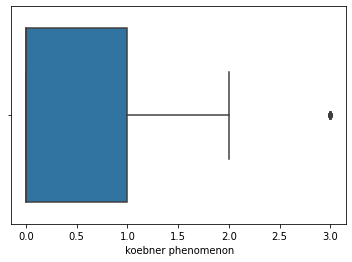

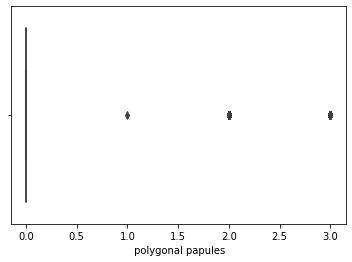

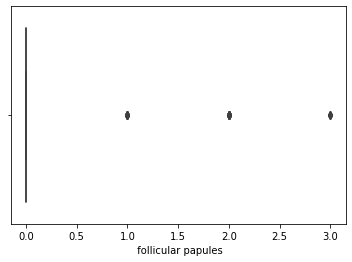

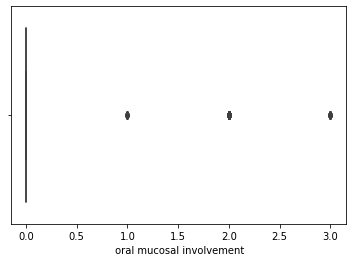

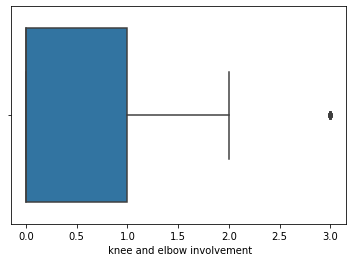

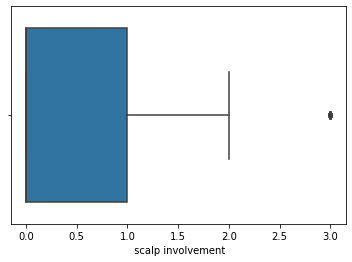

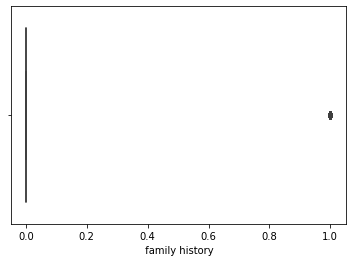

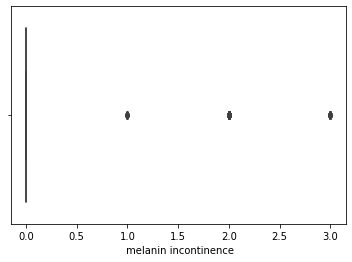

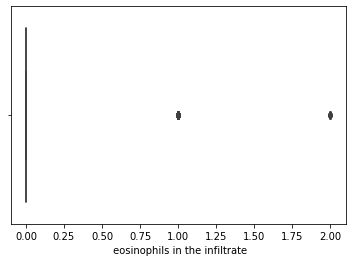

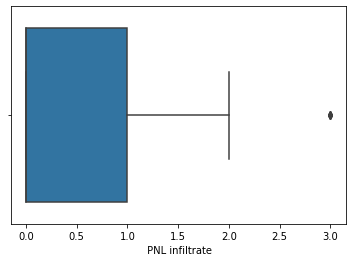

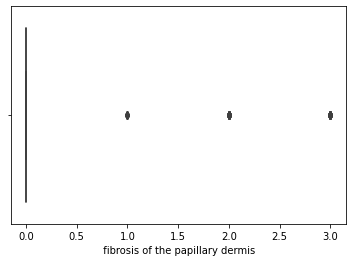

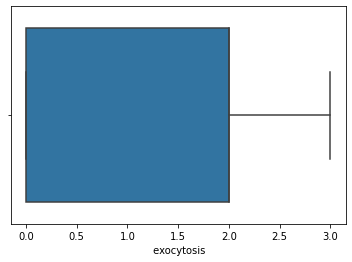

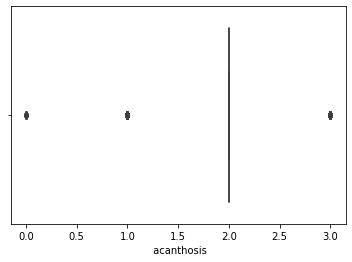

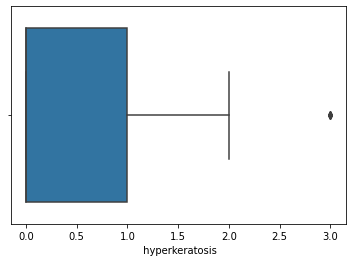

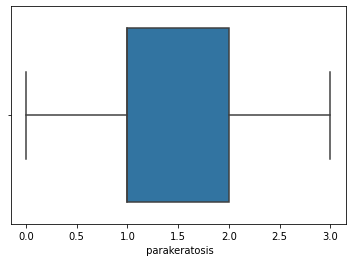

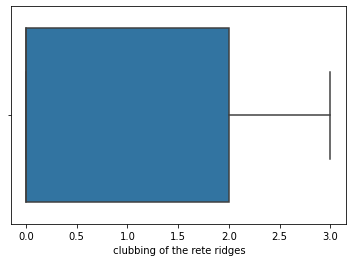

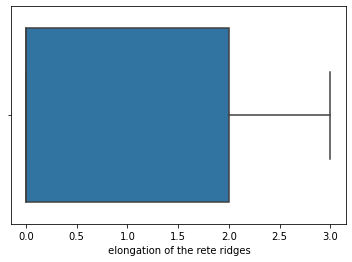

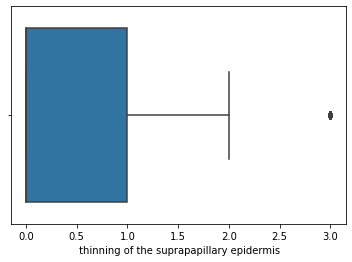

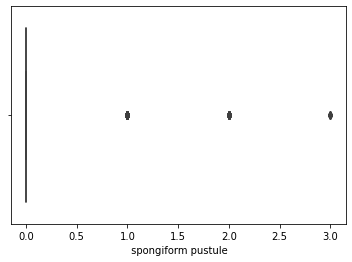

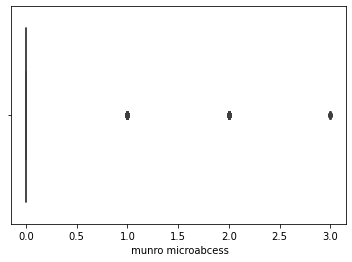

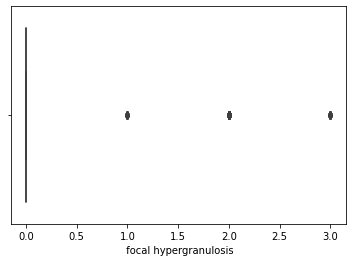

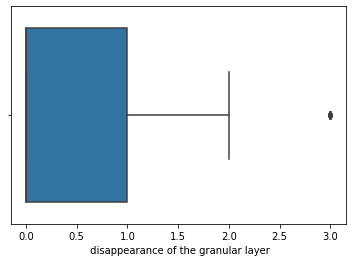

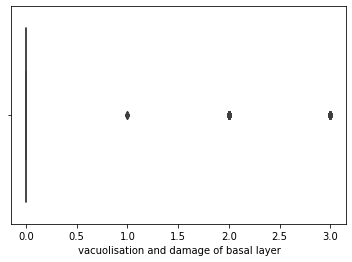

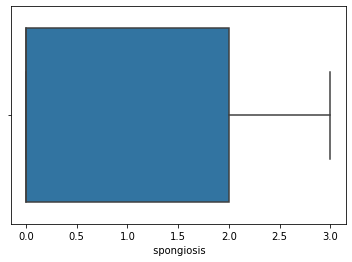

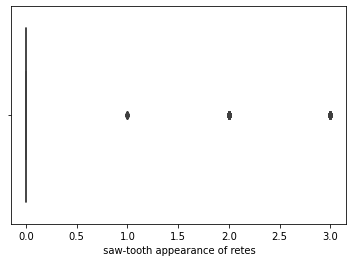

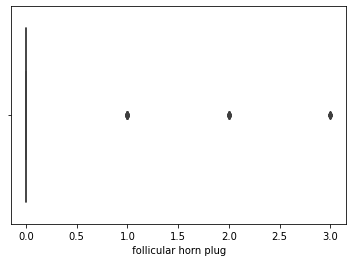

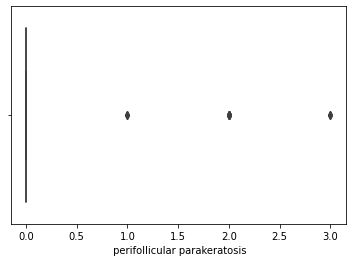

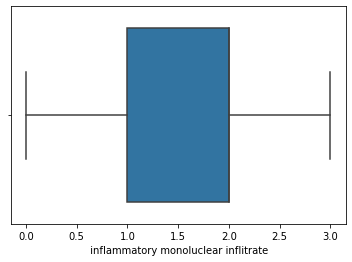

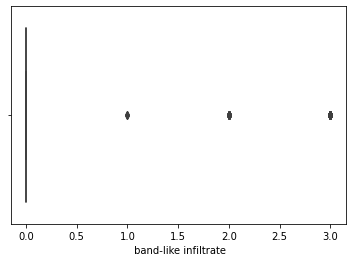

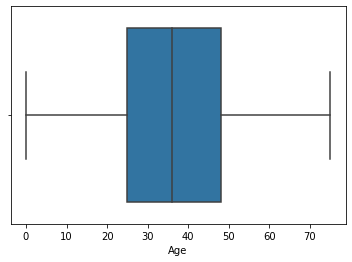

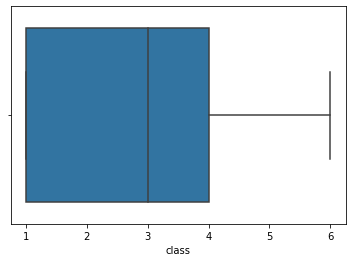

In [15]:
for i in df:
  sns.boxplot(x=df[i])
  plt.show()

In [16]:
g=[i for i in df]
print(g)

[' erythema', ' scaling', ' definite borders', ' itching', ' koebner phenomenon', ' polygonal papules', ' follicular papules', ' oral mucosal involvement', ' knee and elbow involvement', ' scalp involvement', ' family history', ' melanin incontinence', ' eosinophils in the infiltrate', ' PNL infiltrate', ' fibrosis of the papillary dermis', ' exocytosis', ' acanthosis', ' hyperkeratosis', ' parakeratosis', ' clubbing of the rete ridges', ' elongation of the rete ridges', ' thinning of the suprapapillary epidermis', ' spongiform pustule', ' munro microabcess', ' focal hypergranulosis', ' disappearance of the granular layer', ' vacuolisation and damage of basal layer', ' spongiosis', ' saw-tooth appearance of retes', ' follicular horn plug', ' perifollicular parakeratosis', ' inflammatory monoluclear inflitrate', ' band-like infiltrate', 'Age', 'class']


### Outlier Treating with IQR

In [17]:

c=[' erythema',' koebner phenomenon', ' knee and elbow involvement',' scalp involvement', ' PNL infiltrate',' acanthosis', ' hyperkeratosis', ' thinning of the suprapapillary epidermis', ' disappearance of the granular layer']
for i in c:

  IQR=stats.iqr(df[i],interpolation="midpoint")
  q1=df[i].quantile(0.25)
  q2=df[i].quantile(0.75)
  minlimit=q1-1.5*IQR
  maxlimit=q2+1.5*IQR
  print(i,"\n","IQR=",IQR,"minlimit=",minlimit,"maxlimit=",maxlimit)
  

 erythema 
 IQR= 0.0 minlimit= 2.0 maxlimit= 2.0
 koebner phenomenon 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 knee and elbow involvement 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 scalp involvement 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 PNL infiltrate 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 acanthosis 
 IQR= 0.0 minlimit= 2.0 maxlimit= 2.0
 hyperkeratosis 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 thinning of the suprapapillary epidermis 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5
 disappearance of the granular layer 
 IQR= 1.0 minlimit= -1.5 maxlimit= 2.5


In [18]:
for i in c:
  print(i,"\n",df.loc[df[i]<minlimit])

 erythema 
 Empty DataFrame
Columns: [ erythema,  scaling,  definite borders,  itching,  koebner phenomenon,  polygonal papules,  follicular papules,  oral mucosal involvement,  knee and elbow involvement,  scalp involvement,  family history,  melanin incontinence,  eosinophils in the infiltrate,  PNL infiltrate,  fibrosis of the papillary dermis,  exocytosis,  acanthosis,  hyperkeratosis,  parakeratosis,  clubbing of the rete ridges,  elongation of the rete ridges,  thinning of the suprapapillary epidermis,  spongiform pustule,  munro microabcess,  focal hypergranulosis,  disappearance of the granular layer,  vacuolisation and damage of basal layer,  spongiosis,  saw-tooth appearance of retes,  follicular horn plug,  perifollicular parakeratosis,  inflammatory monoluclear inflitrate,  band-like infiltrate, Age, class]
Index: []

[0 rows x 35 columns]
 koebner phenomenon 
 Empty DataFrame
Columns: [ erythema,  scaling,  definite borders,  itching,  koebner phenomenon,  polygonal papule

In [19]:
for i in c:
  print(i,"\n",df.loc[df[i]>maxlimit])

 erythema 
       erythema   scaling   definite borders   itching   koebner phenomenon  \
1            3         3                  3         2                    1   
10           3         3                  2         1                    1   
12           3         3                  1         2                    0   
17           3         3                  3         0                    0   
21           3         2                  2         0                    0   
..         ...       ...                ...       ...                  ...   
348          3         2                  2         0                    0   
352          3         2                  2         3                    2   
362          3         2                  1         0                    1   
363          3         2                  2         2                    3   
365          3         2                  2         0                    0   

      polygonal papules   follicular papules   oral

In [20]:
for i in c:
  df[i].loc[df[i]>maxlimit]=np.median(df[i])
  print(i,"\n",df.loc[df[i]>maxlimit])

 erythema 
 Empty DataFrame
Columns: [ erythema,  scaling,  definite borders,  itching,  koebner phenomenon,  polygonal papules,  follicular papules,  oral mucosal involvement,  knee and elbow involvement,  scalp involvement,  family history,  melanin incontinence,  eosinophils in the infiltrate,  PNL infiltrate,  fibrosis of the papillary dermis,  exocytosis,  acanthosis,  hyperkeratosis,  parakeratosis,  clubbing of the rete ridges,  elongation of the rete ridges,  thinning of the suprapapillary epidermis,  spongiform pustule,  munro microabcess,  focal hypergranulosis,  disappearance of the granular layer,  vacuolisation and damage of basal layer,  spongiosis,  saw-tooth appearance of retes,  follicular horn plug,  perifollicular parakeratosis,  inflammatory monoluclear inflitrate,  band-like infiltrate, Age, class]
Index: []

[0 rows x 35 columns]
 koebner phenomenon 
 Empty DataFrame
Columns: [ erythema,  scaling,  definite borders,  itching,  koebner phenomenon,  polygonal papule

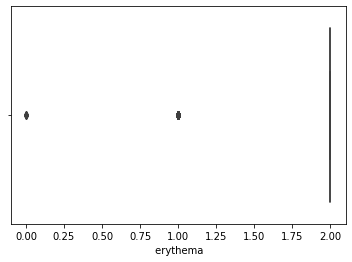

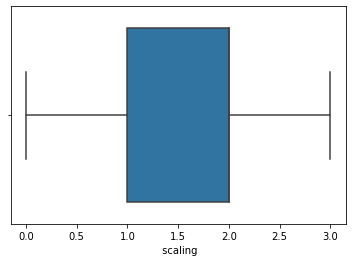

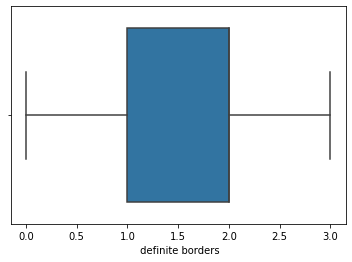

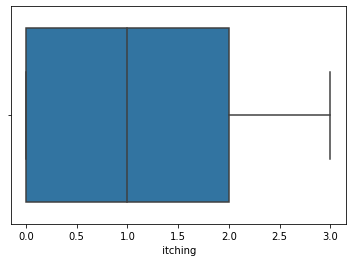

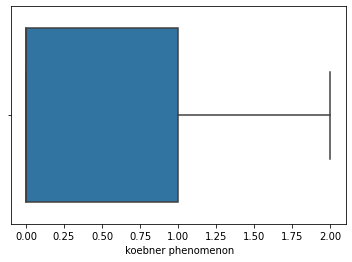

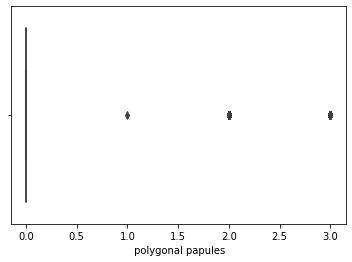

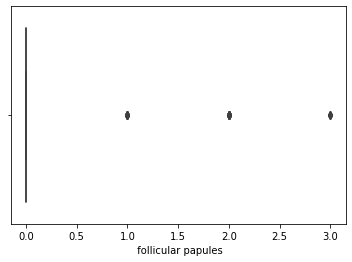

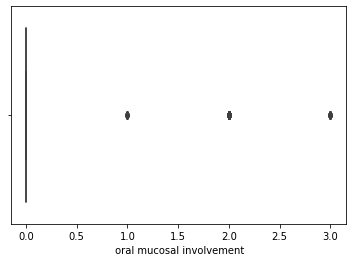

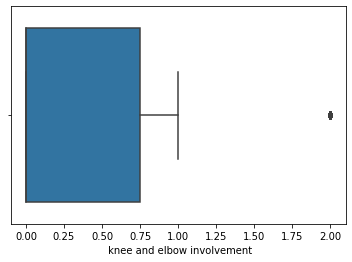

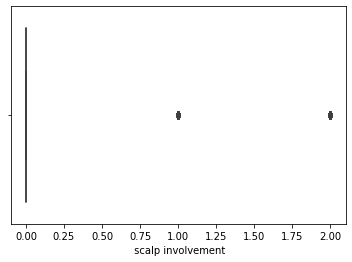

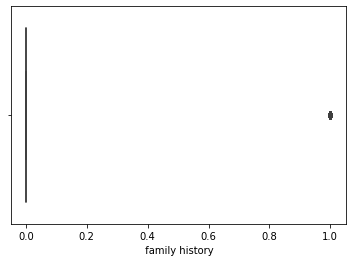

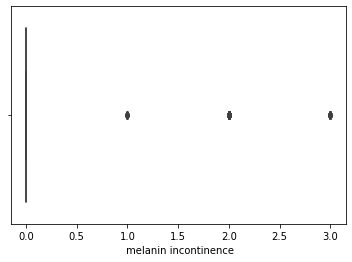

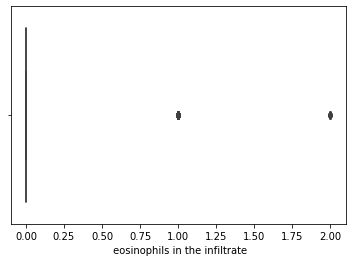

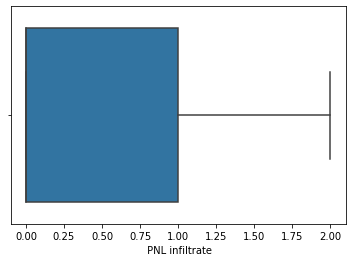

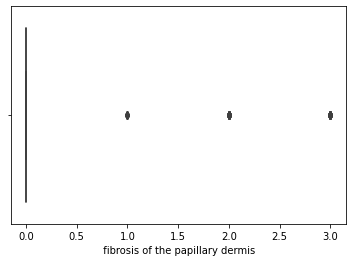

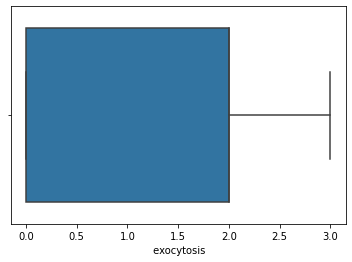

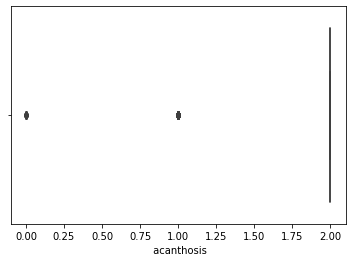

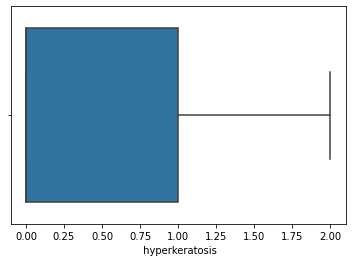

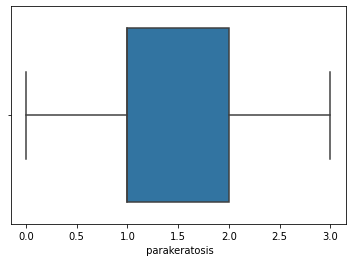

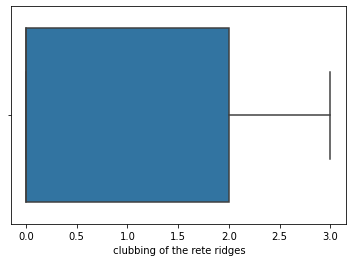

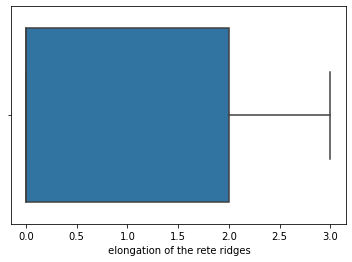

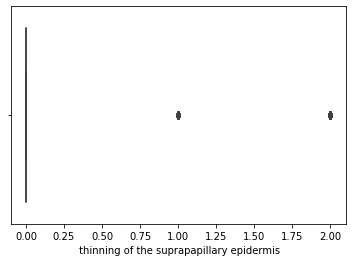

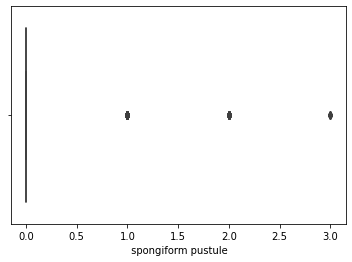

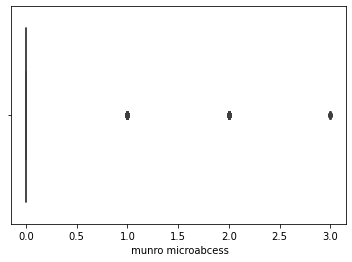

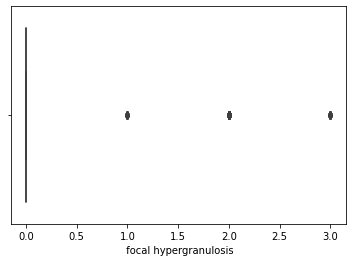

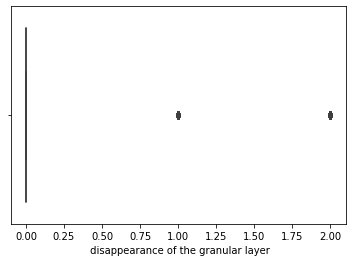

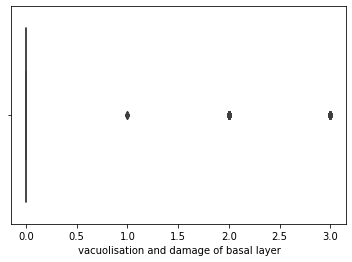

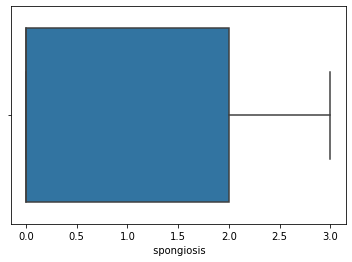

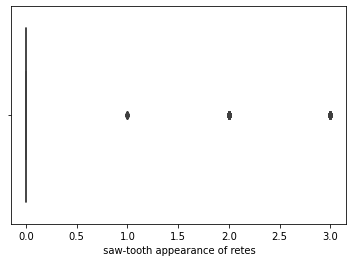

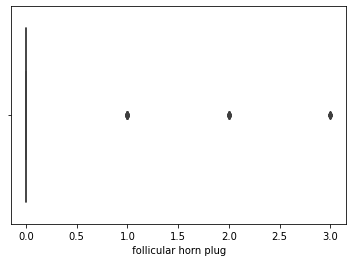

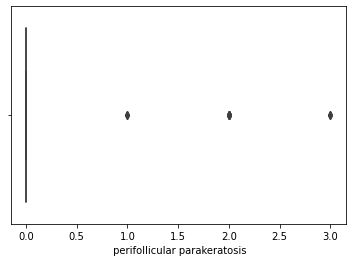

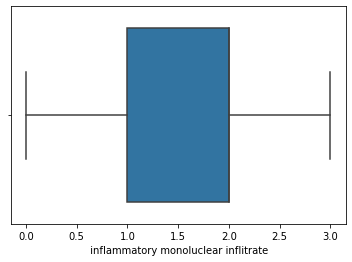

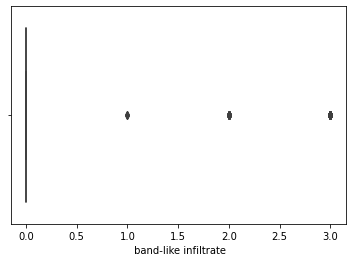

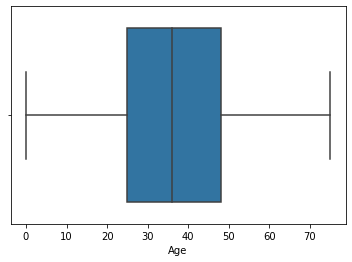

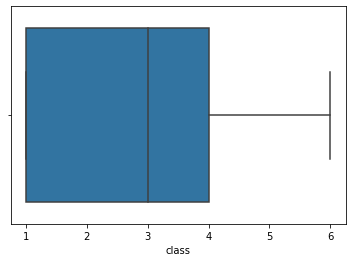

In [21]:
for i in df:
  sns.boxplot(x=df[i])
  plt.show()

## Data Visualization

(<matplotlib.axes._subplots.AxesSubplot at 0x7f92e593dc10>,)

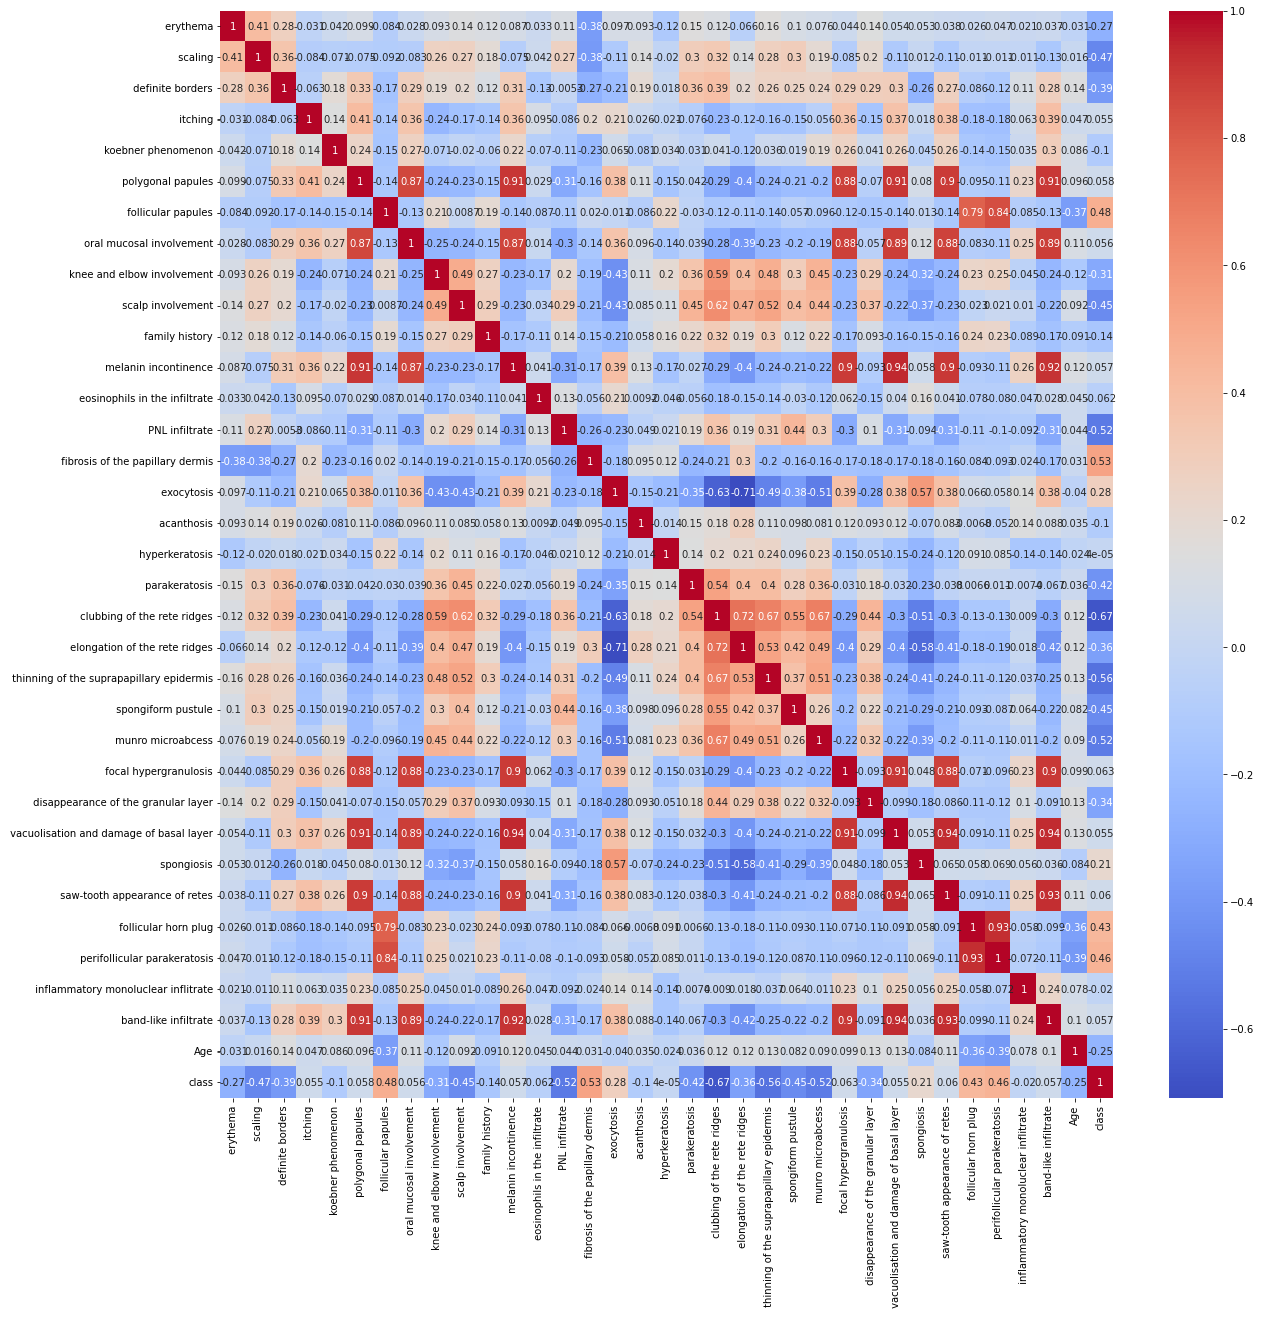

In [22]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm"),

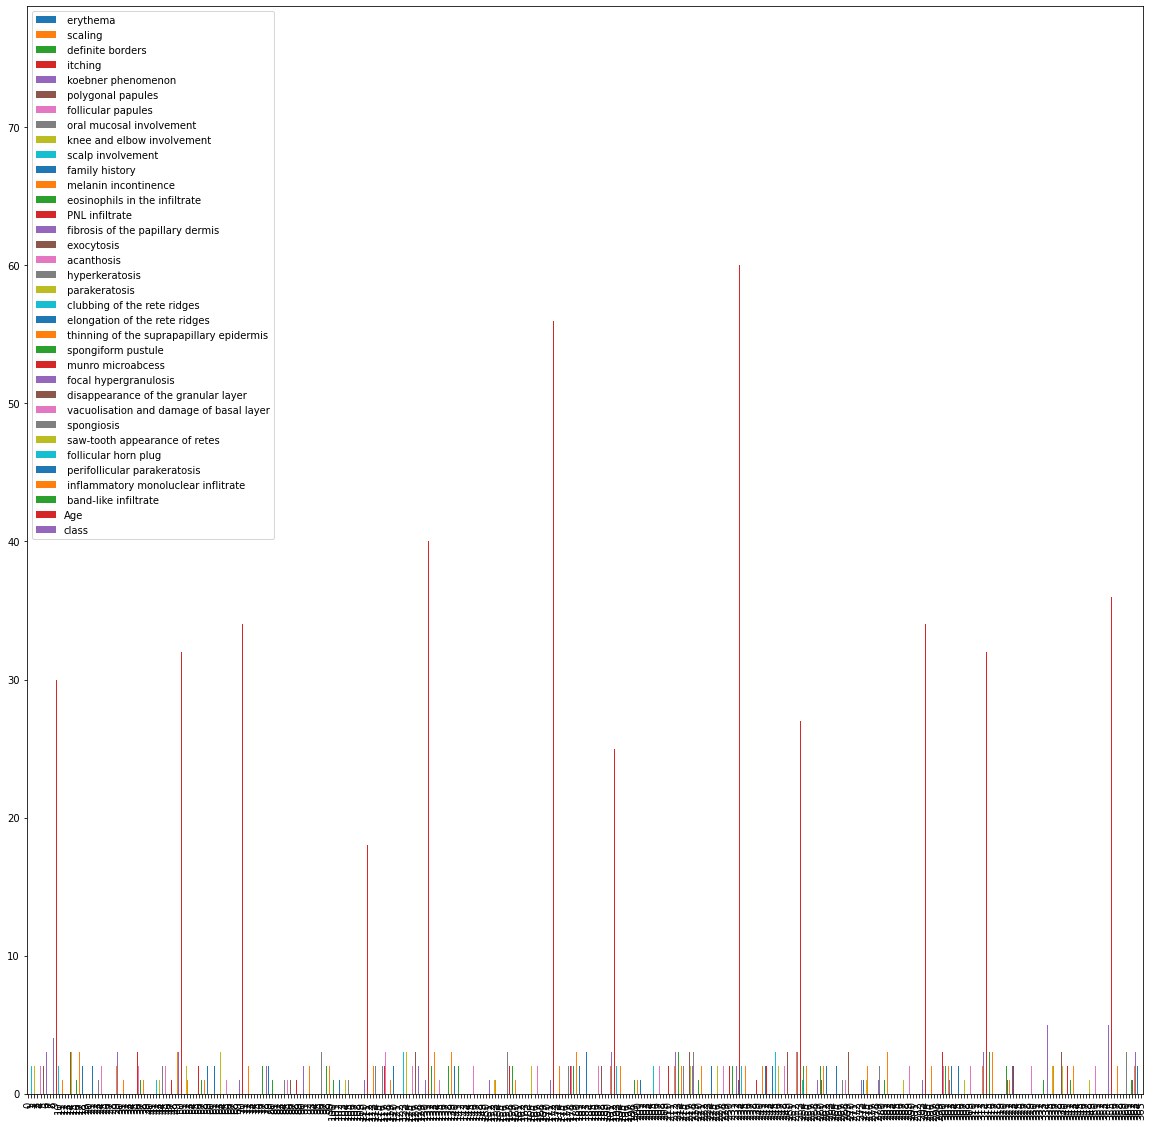

In [24]:
df.plot(kind="bar",figsize=(20,20))

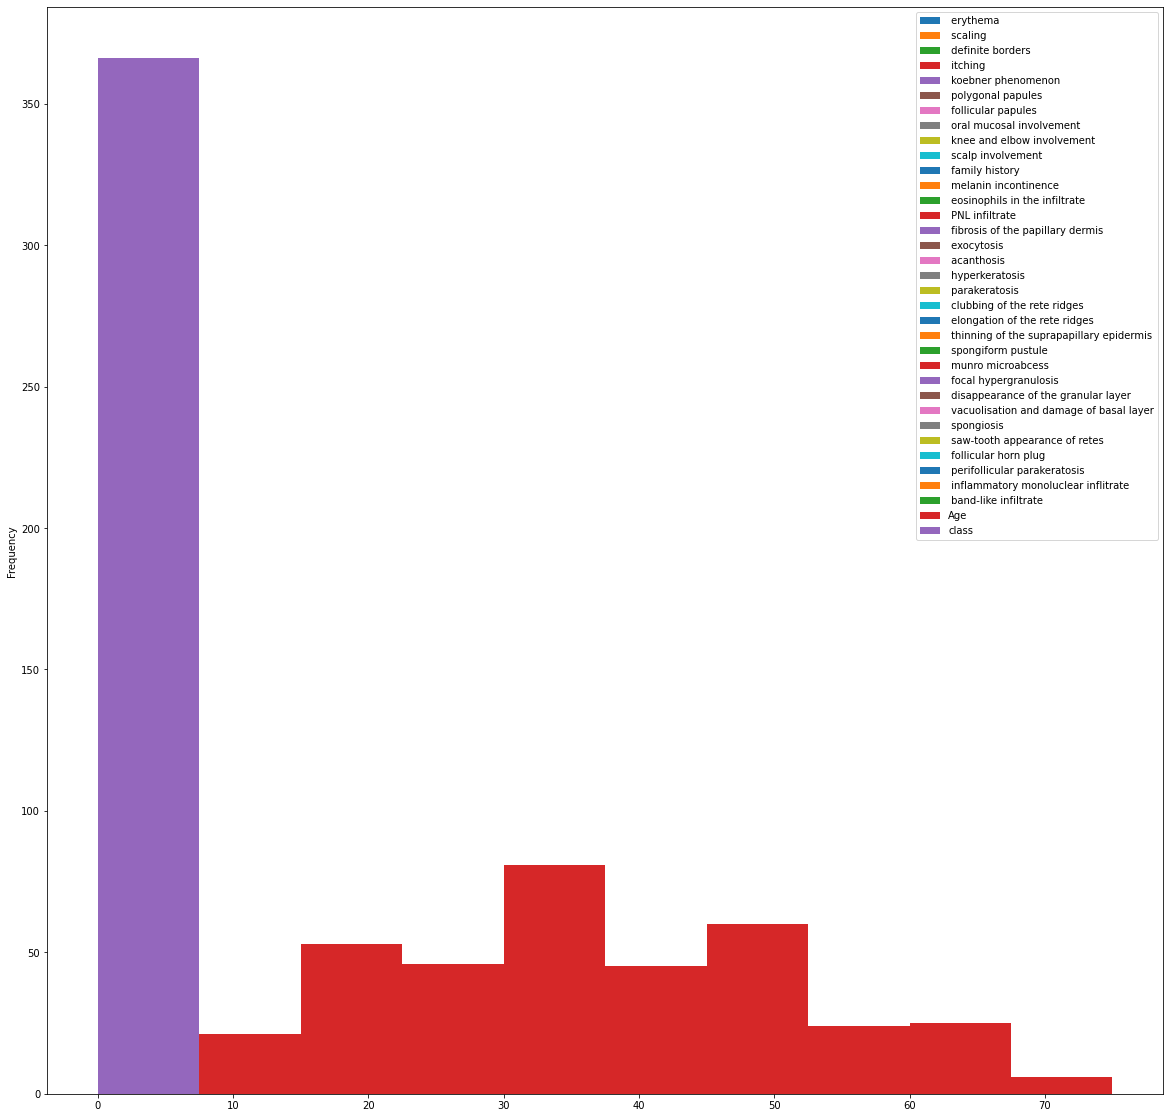

In [25]:
df.plot(kind="hist",figsize=(20,20))

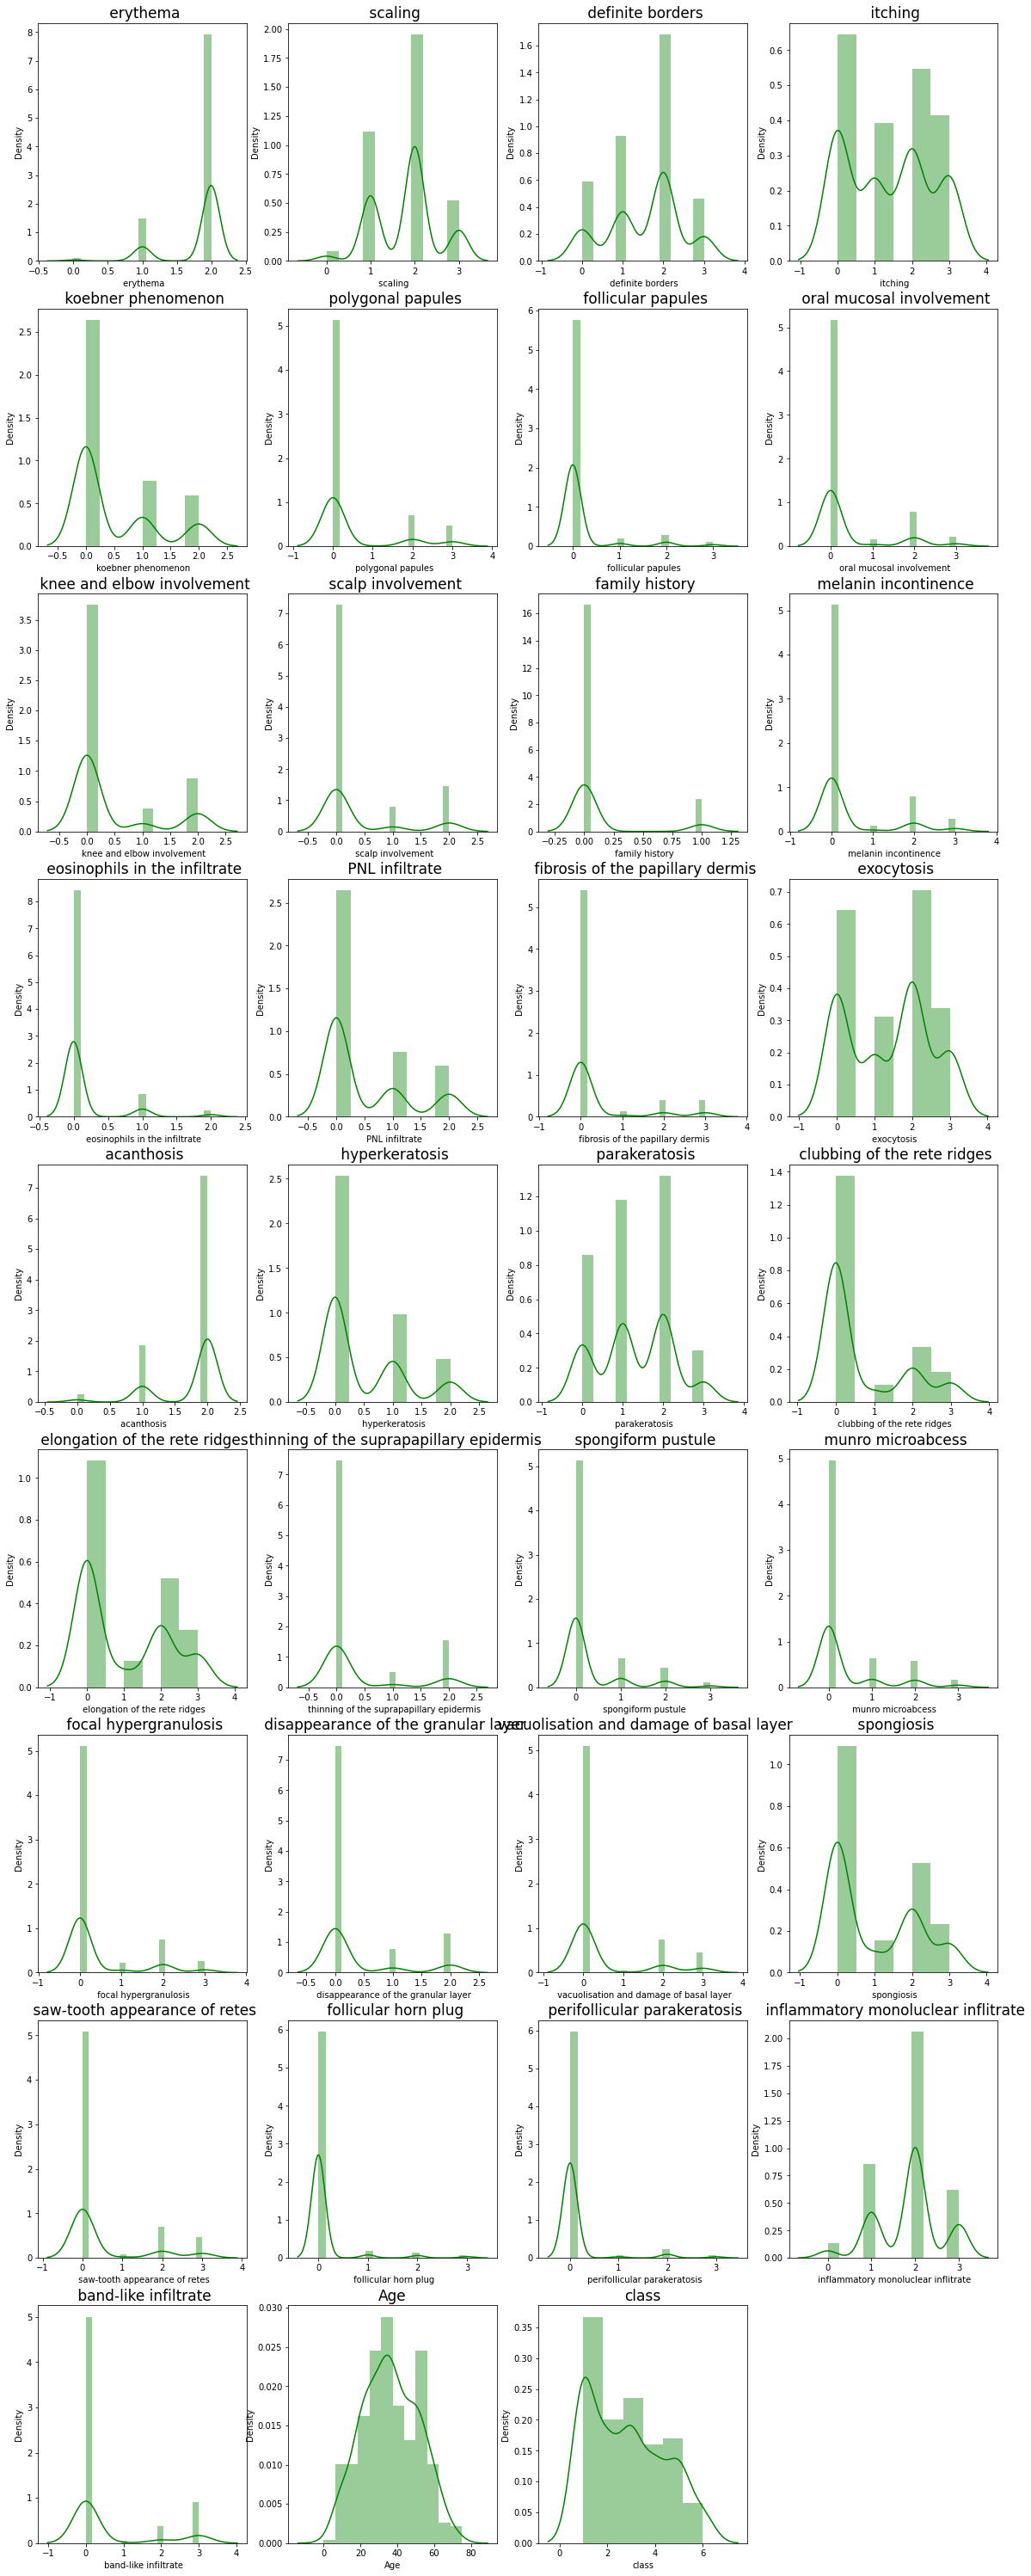

In [26]:
plt.figure(figsize=(20,60))
for n, i in enumerate(g):
  plt.subplot(10,4,n+1)
  sns.distplot(df[i],color="green")
  plt.title(i,fontsize=17)
plt.show()

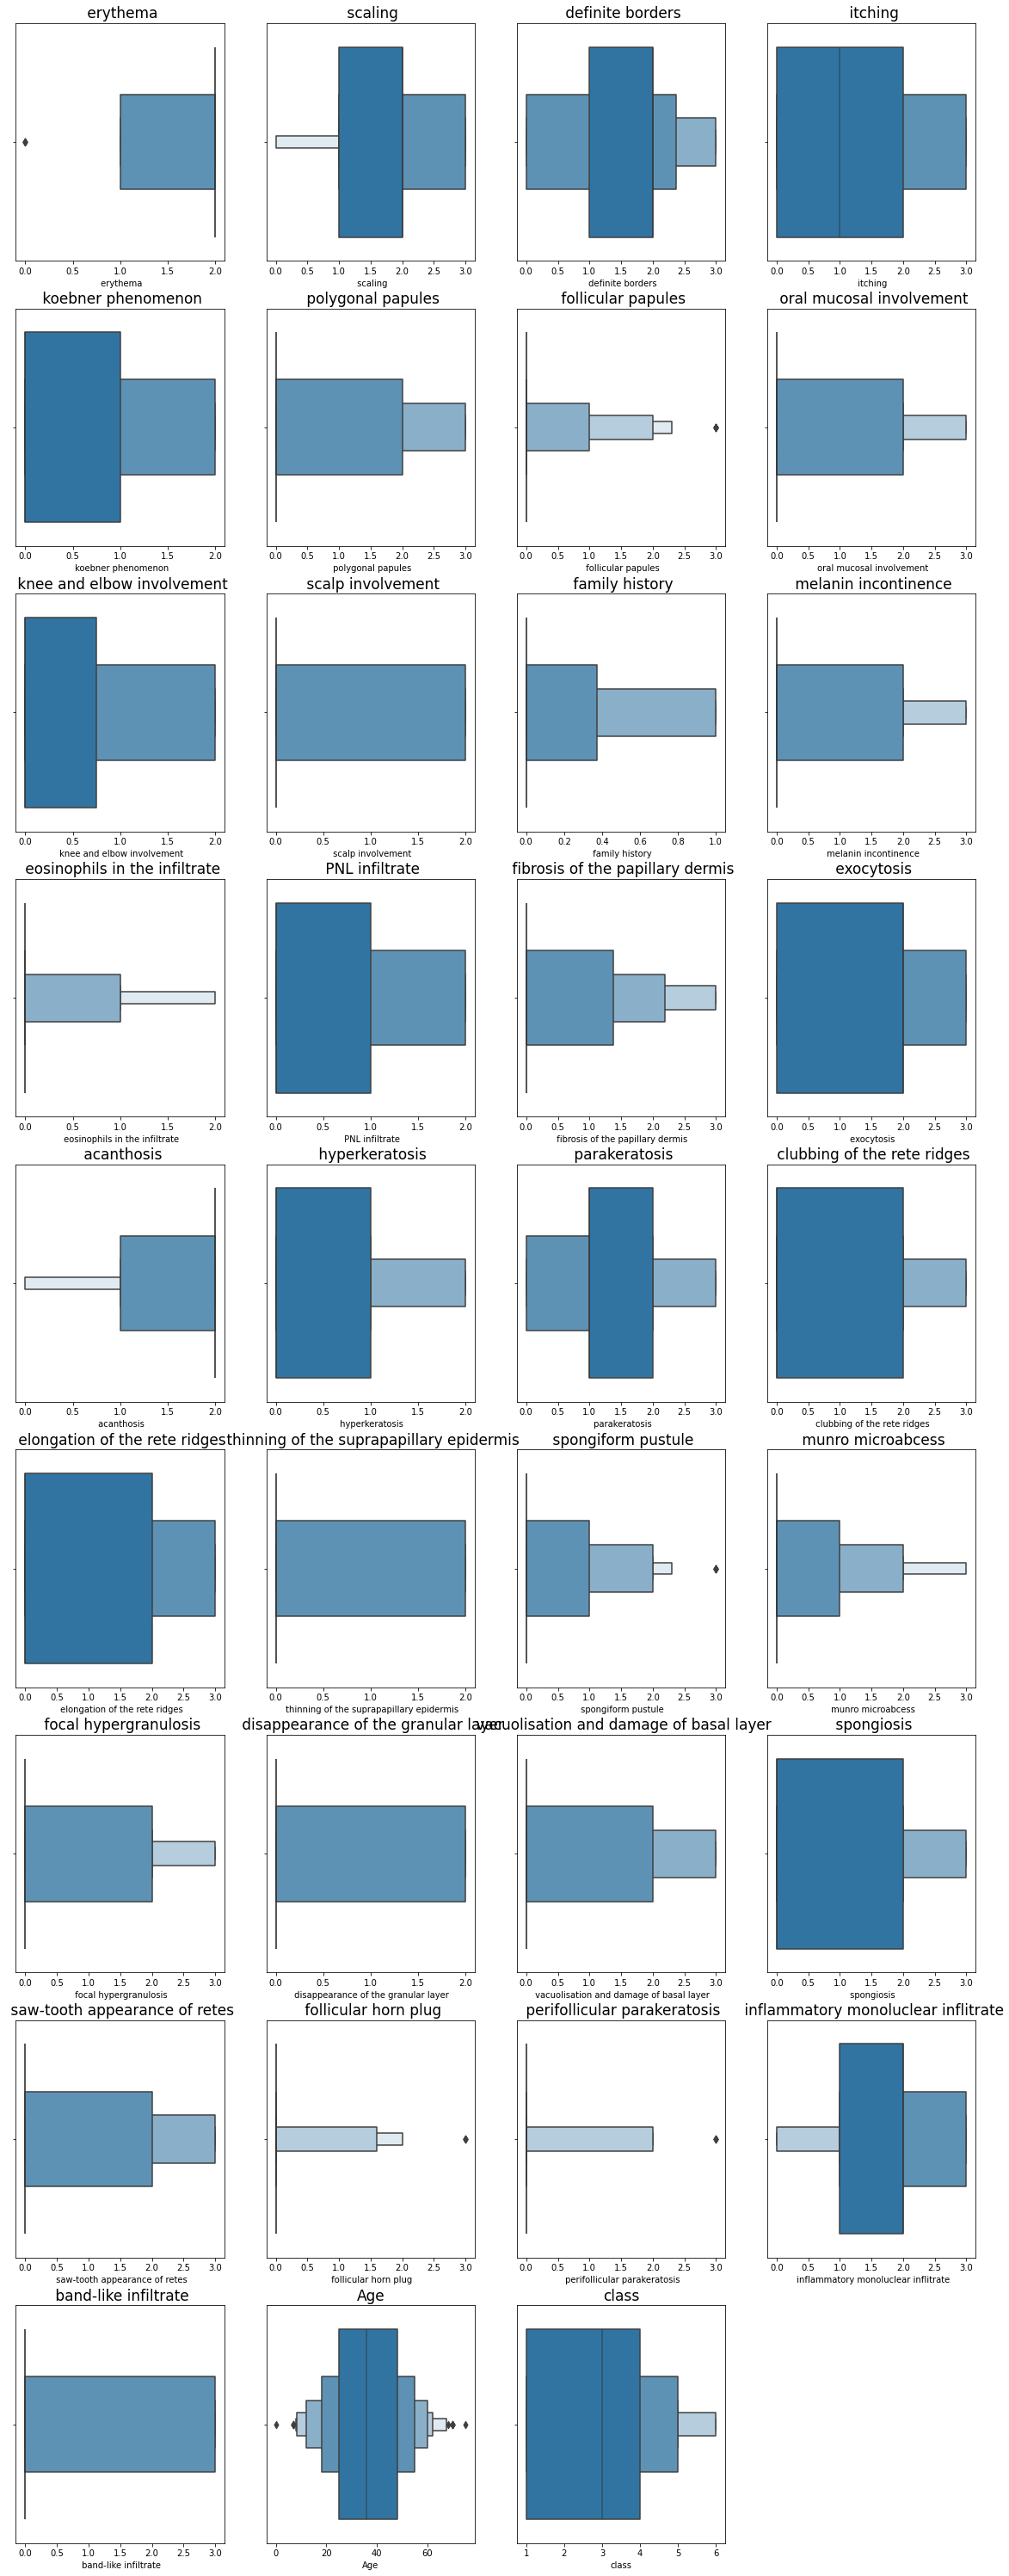

In [27]:
plt.figure(figsize=(20,60))
for n, i in enumerate(g):
  plt.subplot(10,4,n+1)
  sns.boxenplot(df[i])
  plt.title(i,fontsize=17)
plt.show()

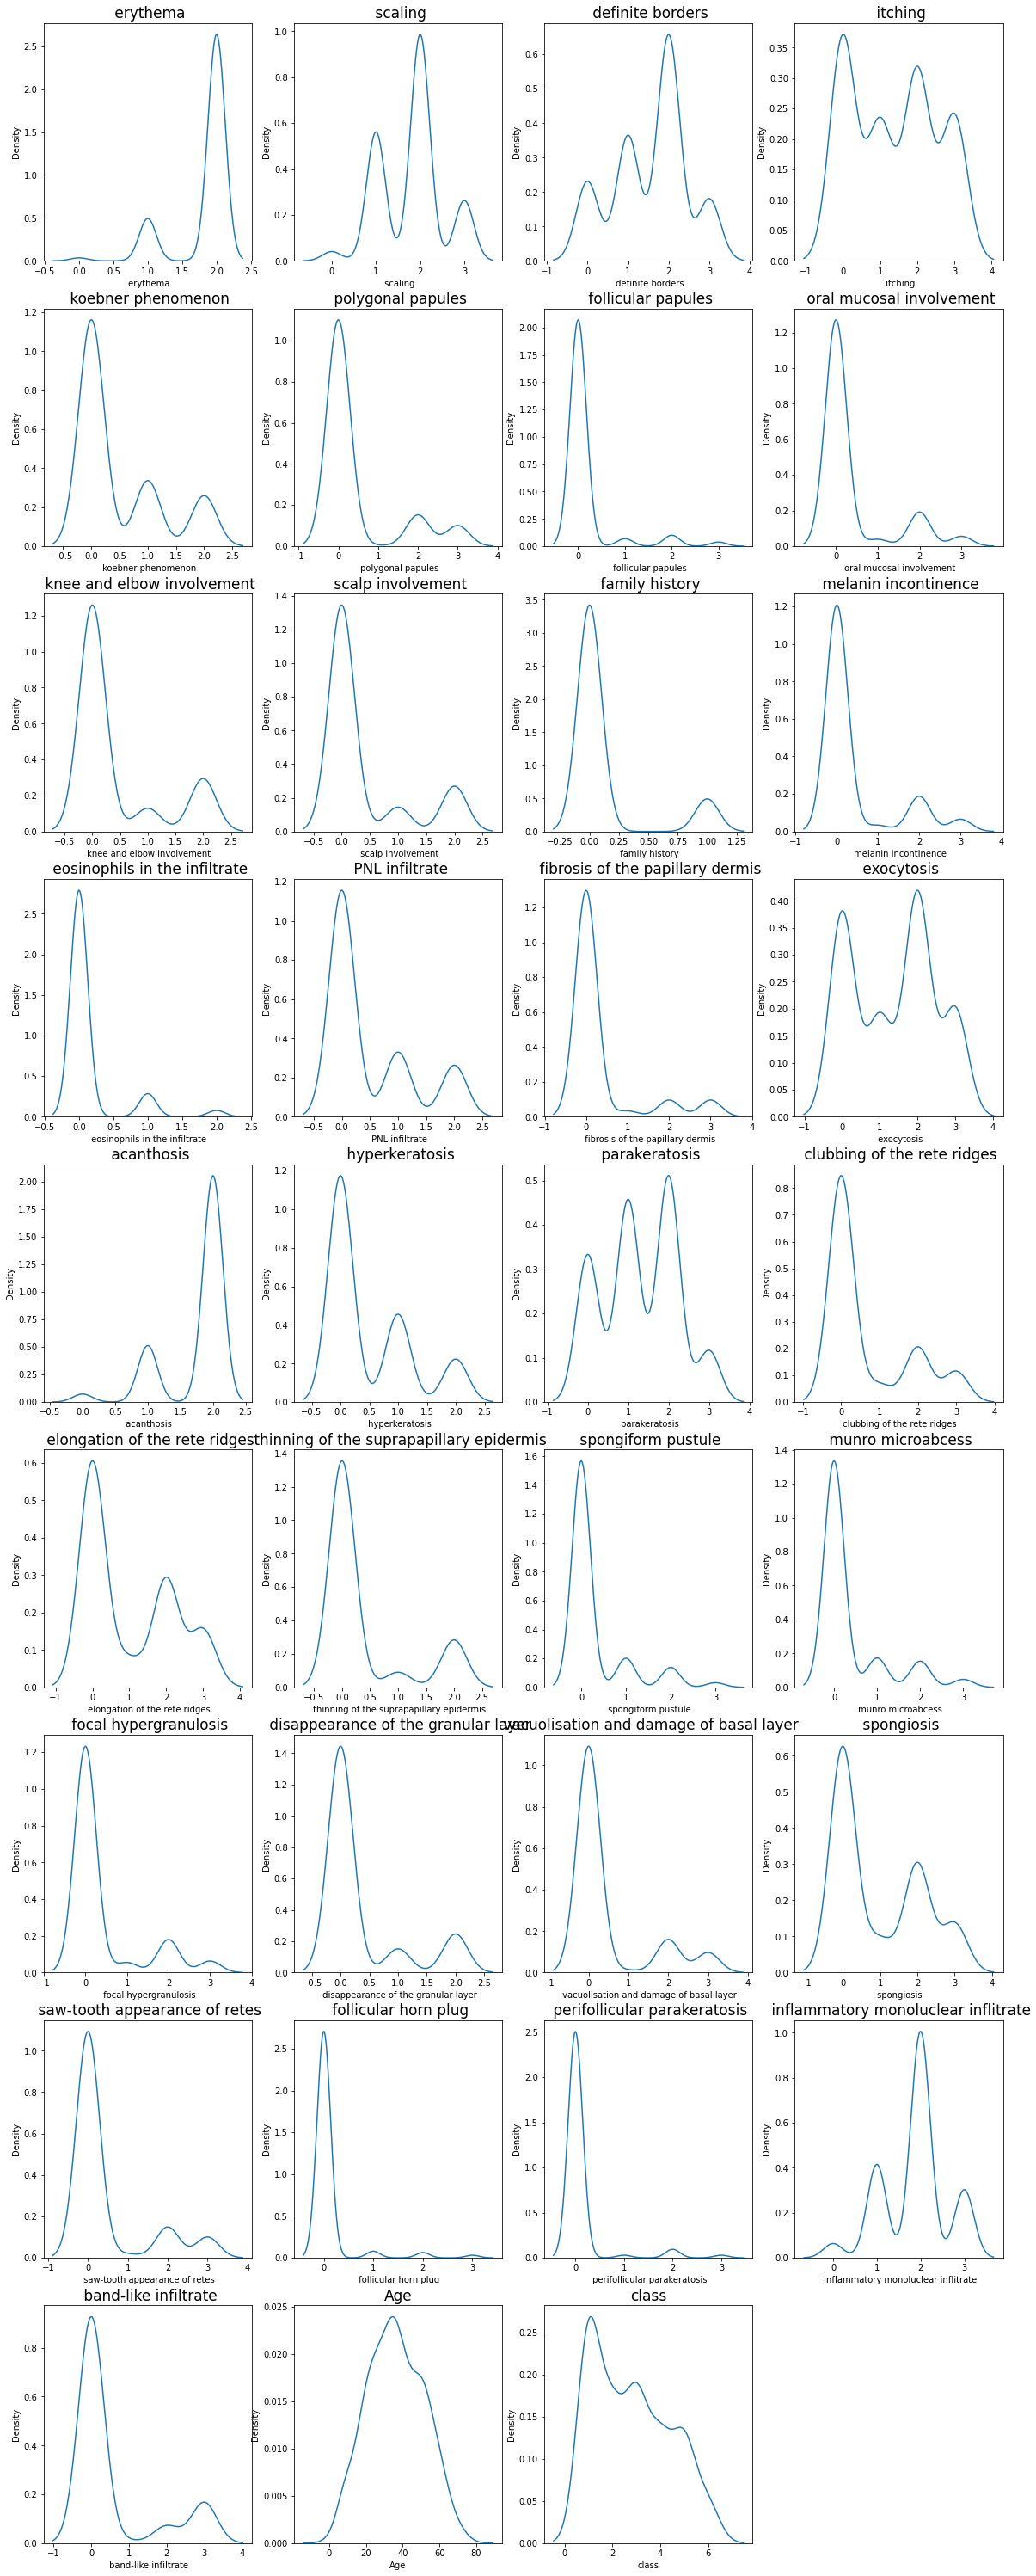

In [28]:
plt.figure(figsize=(20,60))
for n, i in enumerate(g):
  plt.subplot(10,4,n+1)
  sns.kdeplot(df[i])
  plt.title(i,fontsize=17)
plt.show()

##Data spliting

In [29]:
x=df.iloc[:,:34]
x.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55
1,2,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
3,2,2,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,3,0,40
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45


In [30]:
y=df.iloc[:,34]
y.head()

0    2
1    1
2    3
3    1
4    3
Name: class, dtype: int64

#train-test split

In [31]:
xtrain,xtest,ytrain, ytest= train_test_split(x,y ,test_size=0.2,random_state=45)

In [32]:
print("shapes\n","xtrain=",xtrain.shape,"xtest=",xtest.shape,"ytrain=",ytrain.shape,"ytest=",ytest.shape)

shapes
 xtrain= (292, 34) xtest= (74, 34) ytrain= (292,) ytest= (74,)


#Logistic Regression

In [33]:
l=LogisticRegression()
l.fit(xtrain,ytrain)


LogisticRegression()

In [34]:
p=l.predict(xtest)

r2=accuracy_score(ytest,p)
print("testing accuracy=",round(r2*100,2),"%")

testing accuracy= 98.65 %


In [35]:

p1=l.predict(xtrain)
r=accuracy_score(ytrain,p1)
print("training accuracy=",round(r*100,2),"%")

training accuracy= 99.32 %


#KNN

In [36]:

K=list(range(1,21,2))
K

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [37]:
n_grid=[{"n_neighbors":K}]#to find the number of neighbours
model=neighbors.KNeighborsClassifier()
gd=ms.GridSearchCV(estimator=model,param_grid=n_grid,cv=ms.KFold(n_splits=10))
gd.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

In [38]:
best_K=gd.best_params_["n_neighbors"]

In [39]:
print("BEST VALUE OF K:",best_K)

BEST VALUE OF K: 1


In [40]:
Km=neighbors.KNeighborsClassifier(n_neighbors=best_K)
Km.fit(xtrain,ytrain)


KNeighborsClassifier(n_neighbors=1)

In [41]:
pred=Km.predict(xtest)

In [42]:
confusion_matrix(ytest,pred)


array([[24,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  7,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  3,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  7,  1],
       [ 0,  0,  0,  0,  0,  5]])

In [43]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.67      0.46      0.55        13
           3       1.00      1.00      1.00        14
           4       0.50      0.70      0.58        10
           5       1.00      0.88      0.93         8
           6       0.83      1.00      0.91         5

    accuracy                           0.85        74
   macro avg       0.83      0.84      0.83        74
weighted avg       0.86      0.85      0.85        74



#GRADIENT BOOSTING

In [44]:
gb = GradientBoostingClassifier(learning_rate=0.75)

In [45]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.75)

In [46]:
pr=gb.predict(xtest)


In [47]:
confusion_matrix(ytest,pr)

array([[24,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  4,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [48]:


print(classification_report(ytest,pr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.69      0.82        13
           3       1.00      1.00      1.00        14
           4       0.71      1.00      0.83        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         5

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.94        74
weighted avg       0.96      0.95      0.95        74



#random forest and svm

In [49]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5)
rf = RandomForestClassifier(max_depth=4,random_state=42)
s = SVC(C=0.5, random_state=0, kernel='linear')

In [50]:
pt = []
t = []
for i in [l,Km,gb,dt,rf,s]:
  i.fit(xtrain,ytrain)
  pt.append(round(accuracy_score(ytest,i.predict(xtest))*100,2))
  t.append(round(accuracy_score(ytrain,i.predict(xtrain))*100,2))
print(pt)
print(t)  

[98.65, 85.14, 94.59, 95.95, 100.0, 97.3]
[99.32, 100.0, 100.0, 95.55, 97.26, 98.63]


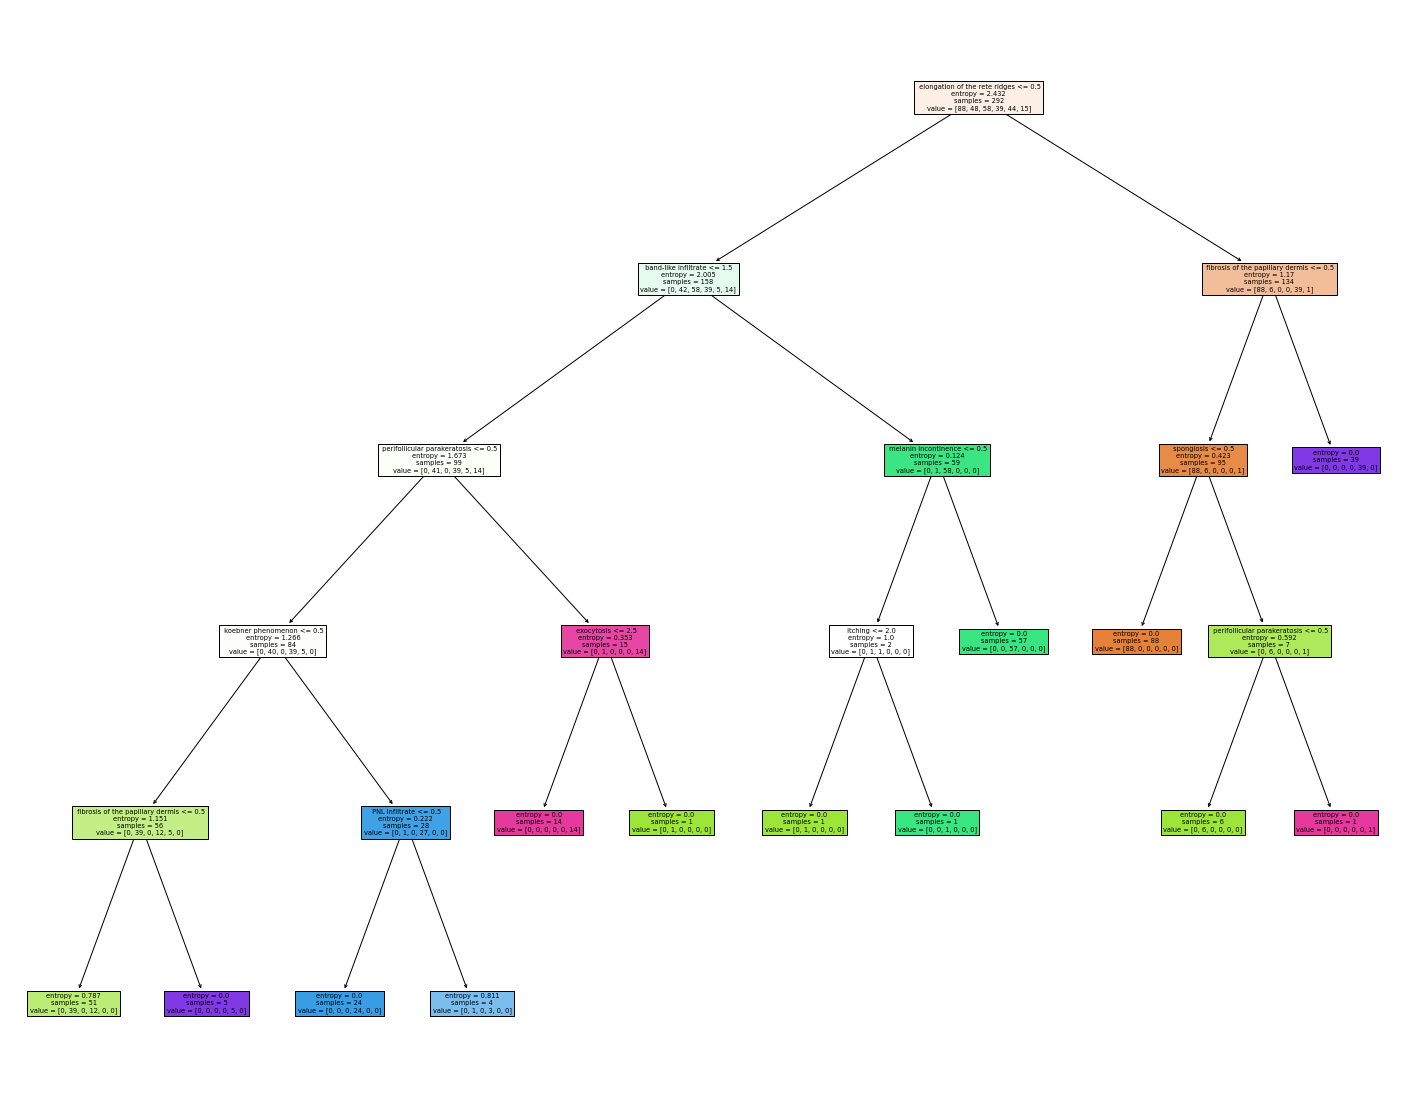

In [51]:

fig=plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=x.columns,filled=True) 
fig.savefig('decision_tree.png') 


In [52]:
m = pd.DataFrame({"Model Name":["Logistic Regression","KNN Classifer","Gradient Booster","DecisionTreeClassifier","RandomForestClassifier","SVC"],"Training accuracy":t,"Testing accuracy":pt})
m

,Model Name,Training accuracy,Testing accuracy
0,Logistic Regression,99.32,98.65
1,KNN Classifer,100.00,85.14
2,Gradient Booster,100.00,94.59
3,DecisionTreeClassifier,95.55,95.95
4,RandomForestClassifier,97.26,100.00
5,SVC,98.63,97.30


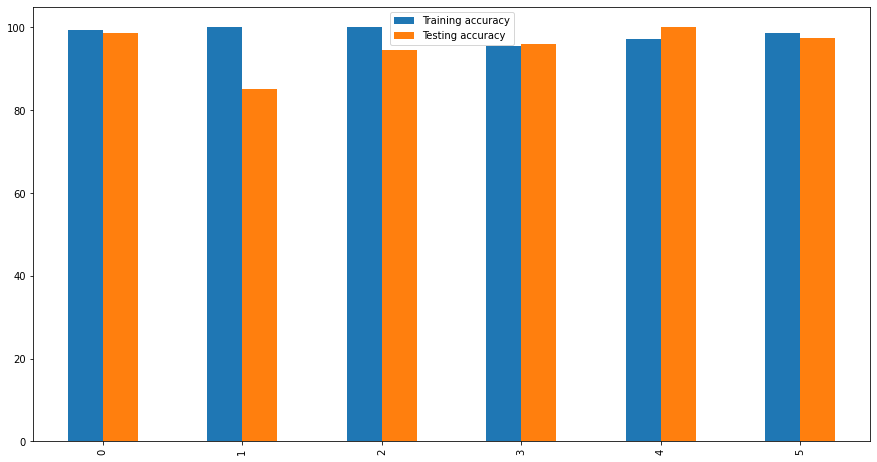

In [53]:
m.plot(kind="bar",figsize=(15,8))

# Prediction using data inside the Dataset

In [54]:
Eva_data=s.predict([[2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55]])
if Eva_data==1:
    w="psoriasis"
elif Eva_data==2:
    w="seborrheic dermatitis"
elif Eva_data==3:
    w="lichen planus"
elif Eva_data==4:
    w="pityriasis rosea"
elif Eva_data==5:
    w="chronic dermatitis"
elif Eva_data==6:
    w="pityriasis rubra pilaris"
else:
  print('invalid statement')
print('The dermatic disease is ',w)
  

The dermatic disease is  seborrheic dermatitis


# Prediction from external Data

In [55]:
a=[]
#def pred_disease(a):
g=[' erythema', ' scaling', ' definite borders', ' itching', ' koebner phenomenon', ' polygonal papules', ' follicular papules', ' oral mucosal involvement', ' knee and elbow involvement', ' scalp involvement', ' family history', ' melanin incontinence', ' eosinophils in the infiltrate', ' PNL infiltrate', ' fibrosis of the papillary dermis', ' exocytosis', ' acanthosis', ' hyperkeratosis', ' parakeratosis', ' clubbing of the rete ridges', ' elongation of the rete ridges', ' thinning of the suprapapillary epidermis', ' spongiform pustule', ' munro microabcess', ' focal hypergranulosis', ' disappearance of the granular layer', ' vacuolisation and damage of basal layer', ' spongiosis', ' saw-tooth appearance of retes', ' follicular horn plug', ' perifollicular parakeratosis', ' inflammatory monoluclear inflitrate', ' band-like infiltrate', 'Age']
for i in g:
  i=int(input( i ))
  a.append(i)
print(a)  
h=s.predict([a])
if h==1:
   w="psoriasis"
elif h==2:
   w="seborrheic dermatitis"
elif h==3:
   w="lichen planus"
elif h==4:
   w="pityriasis rosea"
elif h==5:
   w="chronic dermatitis"
elif h==6:
   w="pityriasis rubra pilaris"
else:
  print('invalid  disease statement')
print('Prediction ',"=","The Dermatic disorder is ",w,"\n")




 erythema1
 scaling1
 definite borders2
 itching3
 koebner phenomenon6
 polygonal papules4
 follicular papules5
 oral mucosal involvement4
 knee and elbow involvement2
 scalp involvement4
 family history3
 melanin incontinence2
 eosinophils in the infiltrate3
 PNL infiltrate6
 fibrosis of the papillary dermis2
 exocytosis2
 acanthosis2
 hyperkeratosis3
 parakeratosis5
 clubbing of the rete ridges1
 elongation of the rete ridges2
 thinning of the suprapapillary epidermis3
 spongiform pustule6
 munro microabcess5
 focal hypergranulosis6
 disappearance of the granular layer2
 vacuolisation and damage of basal layer3
 spongiosis11
 saw-tooth appearance of retes2
 follicular horn plug3
 perifollicular parakeratosis2
 inflammatory monoluclear inflitrate2
 band-like infiltrate2
Age23
[1, 1, 2, 3, 6, 4, 5, 4, 2, 4, 3, 2, 3, 6, 2, 2, 2, 3, 5, 1, 2, 3, 6, 5, 6, 2, 3, 11, 2, 3, 2, 2, 2, 23]
Prediction  = The Dermatic disorder is  lichen planus 

